<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#breast-Data" data-toc-modified-id="breast-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>breast Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Plot-Kernels" data-toc-modified-id="Plot-Kernels-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Kernels</a></span></li></ul></li><li><span><a href="#BEMKL" data-toc-modified-id="BEMKL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BEMKL</a></span><ul class="toc-item"><li><span><a href="#Non-Sparse" data-toc-modified-id="Non-Sparse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Non-Sparse</a></span></li><li><span><a href="#Kernel-Sparse" data-toc-modified-id="Kernel-Sparse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kernel-Sparse</a></span></li><li><span><a href="#data-sparse" data-toc-modified-id="data-sparse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>data-sparse</a></span></li><li><span><a href="#data-and-kernel-sparse" data-toc-modified-id="data-and-kernel-sparse-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>data and kernel sparse</a></span></li><li><span><a href="#Sparsity-Plots" data-toc-modified-id="Sparsity-Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sparsity Plots</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Cross Validation</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd

import scipy as sc
from scipy.io import loadmat

import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

import time

import util
from util import *
import plot
import bemkl_binary


np.random.seed(123)

# Prepare Data

1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
3. lKernel Preprocessing


## breast Data

In [3]:
reload(util)


X_breast, y_breast  = util.get_breast_data()
X_breast = util.preprocess_feats(X_breast)

N = int(X_breast.shape[0]*.75)

K_breast = util.get_kernels(X_breast, poly=True, feat_kernel=True, gauss=True, max_gauss_width=3, min_gauss_width=-1)

K_breast = util.preprocess_kernel(K_breast)
K, K_test = K_breast[:,:N,:N],K_breast[:,N:,:N]
y, y_test = y_breast[:N], y_breast[N:]

P = K.shape[0]

print 'Number of Kernels:', P
print 'Data Points:', X_breast.shape[0]
print 'Training Points:', N

Number of Kernels: 248
Data Points: 569
Training Points: 426


## Plot Data

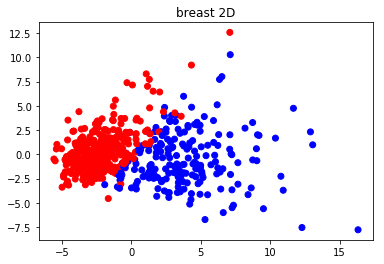

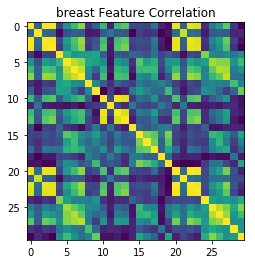

In [4]:
plot.plot_data(X_breast,y_breast, 'breast')

## Plot Kernels

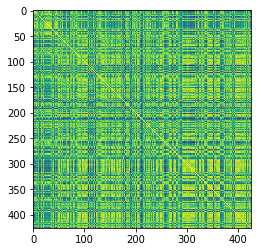

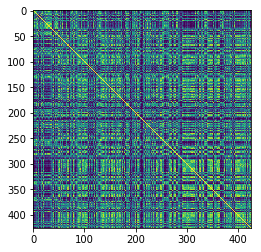

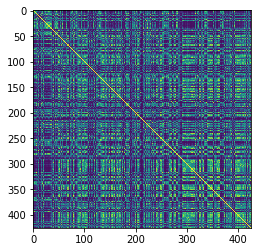

In [5]:
for i in range(3):
    plot.plot_kernel(K[i,...],'breast_k%d'%i)

# BEMKL

## Non-Sparse

In [8]:
### One time Evaluation 

reload(bemkl_binary)

nsp_clf = bemkl_binary.BEMKL(sparse=False)

t1 = time.time()

nsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = nsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.986013986013986
Training Time: 43.0616731644


In [9]:
nsp_clf.report_results()

Nmber of Chosen Kernels:
190
Nmber of Chosen Points:
219


## Kernel-Sparse

In [10]:
sp_clf = bemkl_binary.BEMKL(sparse=True)

t1 = time.time()

sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.9790209790209791
Training Time: 45.9470610619


In [11]:
sp_clf.report_results()

Nmber of Chosen Kernels:
72
Nmber of Chosen Points:
222


## data-sparse

In [12]:
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)

t1 = time.time()

dsp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = dsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.986013986013986
Training Time: 43.9849510193


In [13]:
dsp_clf.report_results()

Nmber of Chosen Kernels:
183
Nmber of Chosen Points:
5


## data and kernel sparse

In [ ]:
'''all_sp_clf = bemkl_binary.BEMKL(data_sparse=True, sparse=True)

t1 = time.time()

all_sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = all_sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff'''

## Sparsity Plots

In [ ]:
plot.plot_results(nsp_clf, 'breast_nsp')
plot.plot_results(sp_clf, 'breast_sp')
plot.plot_results(dsp_clf, 'breast_dsp')
plot.plot_results(all_sp_clf, 'breast_all_sp')


## Cross Validation

In [6]:
print 'Cross Validation Results for Non-Sparse model:'
nsp_clf = bemkl_binary.BEMKL(sparse=False)
nsp_clf.evaluate_model(K_breast,y_breast)

print 'Cross Validation Results for Kernel-Sparse model:'
sp_clf = bemkl_binary.BEMKL(sparse=True)
sp_clf.evaluate_model(K_breast,y_breast)

print 'Cross Validation Results for Data-Sparse model:'
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)
dsp_clf.evaluate_model(K_breast,y_breast)

Cross Validation Results for Non-Sparse model:
Mean Accuracy: 0.9718987734823784
Cross Validation Results for Kernel-Sparse model:
Mean Accuracy: 0.9631113181183046
Cross Validation Results for Data-Sparse model:
Mean Accuracy: 0.9718987734823784
